In [2]:
import os
import sys
print(os.getcwd())
os.chdir('..')
print(os.getcwd())
sys.path.append(os.getcwd())
print(sys.path)

import logging
import uuid

import pandas as pd
import numpy as np
from sqlalchemy import select, func, distinct, or_, text

sys.path.append(os.getcwd())

from scheme import METHOD, TECHNOLOGY, FOCUS

logging.basicConfig(format='%(asctime)s [%(levelname)s] %(name)s: %(message)s', level=logging.INFO)
logger = logging.getLogger('import')
logger.setLevel(logging.DEBUG)

pd.options.display.max_columns = None

/home/rept/workspace/cdr_ecosystem/Exploration
/home/rept/workspace/cdr_ecosystem
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/rept/.venvs/main12/lib/python3.12/site-packages', '/home/rept/workspace/cdr_ecosystem']


In [10]:
from matplotlib import pyplot as plt

In [47]:
df_beccs = pd.read_feather('data/beccs/predictions.arrow')
df_beccs_orig = pd.read_feather('data/beccs/predictions_orig.arrow')
df_scs = pd.read_feather('data/scs/predictions.arrow')
df_scs_orig = pd.read_feather('data/scs/predictions_orig.arrow')

beccs_incl = df_beccs['pred'] > 0
beccs_rev = df_beccs['meth|5'] >= 0.5

scs_incl = df_scs['pred'] > 0
scs_rev = df_scs['meth|5'] >= 0.5

In [5]:
df_scs.columns

Index(['id', 'display_name', 'title', 'abstract', 'title_abstract',
       'authorships', 'biblio', 'locations', 'is_retracted', 'is_accepted',
       'cited_by_count', 'is_paratext', 'is_published', 'language', 'type',
       'mag', 'publication_year', '_version_', 'publication_date',
       'created_date', 'updated_date', 'indexed_in', 'doi', 'pmid', 'pmcid',
       'text', 'pred|0', 'pred|1', 'pred', 'meth|0', 'meth', 'meth|1',
       'meth|2', 'meth|3', 'meth|4', 'meth|5', 'meth|6', 'meth|7', 'meth|8',
       'meth|9'],
      dtype='object')

## Histograms

### Soil carbon

In [9]:
hist = df_scs.groupby('publication_year').count()
hist_rev = df_scs[scs_rev].groupby('publication_year').count()
hist_incl = df_scs[scs_incl].groupby('publication_year').count()
hist_ri = df_scs[scs_incl & scs_rev].groupby('publication_year').count()

In [ ]:
fig, ax = plt.subplots()
ax.bar(hist.index, hist.values[:,0])
ax.set_xlim(1990, 2024)

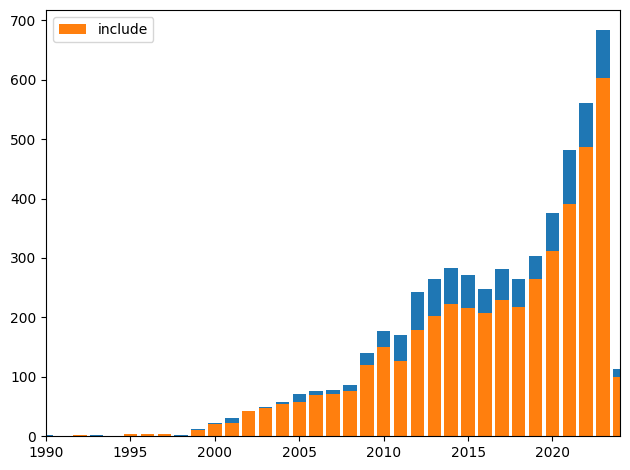

In [46]:
fig, ax = plt.subplots()

base = (hist - hist_incl).fillna(0)
rest = (base - base + hist_incl).fillna(0)

ax.bar(hist.index, base.values[:,0], bottom=rest.values[:,0])
ax.bar(hist.index, rest.values[:,0], label='include')

ax.set_xlim(1990, 2024)
ax.legend()
fig.tight_layout()

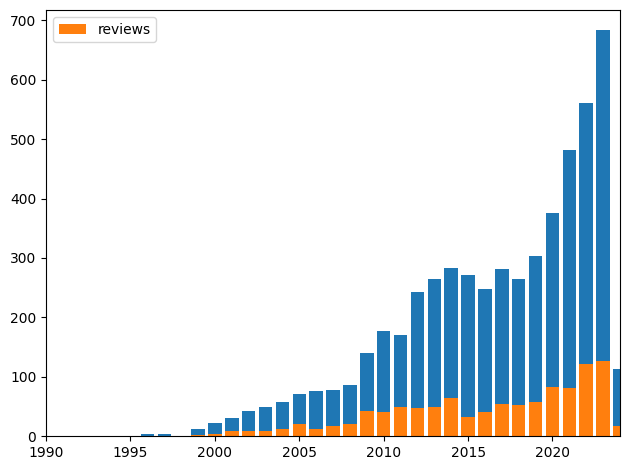

In [45]:
fig, ax = plt.subplots()

base = (hist - hist_rev).fillna(0)
rest = (base - base + hist_rev).fillna(0)

ax.bar(hist.index, base.values[:,0], bottom=rest.values[:,0])
ax.bar(hist.index, rest.values[:,0], label='reviews')

ax.set_xlim(1990, 2024)
ax.legend()
fig.tight_layout()

### BECCS

In [48]:
hist = df_beccs.groupby('publication_year').count()
hist_rev = df_beccs[beccs_rev].groupby('publication_year').count()
hist_incl = df_beccs[beccs_incl].groupby('publication_year').count()
hist_ri = df_beccs[beccs_incl & beccs_rev].groupby('publication_year').count()

(1990.0, 2024.0)

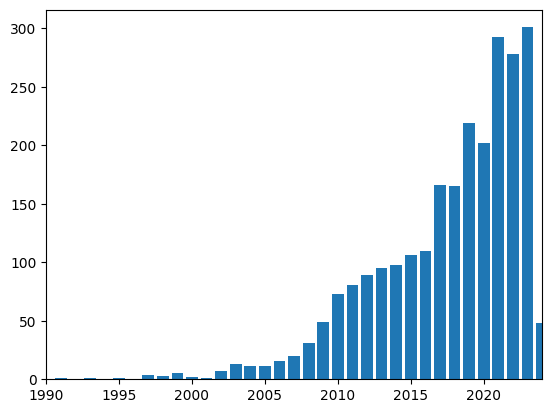

In [49]:
fig, ax = plt.subplots()
ax.bar(hist.index, hist.values[:,0])
ax.set_xlim(1990, 2024)

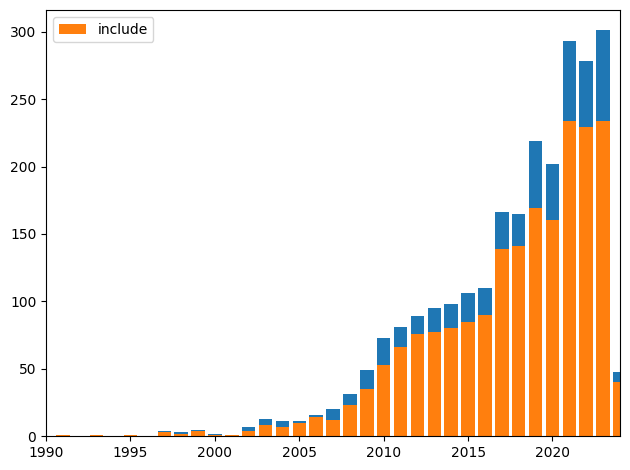

In [50]:
fig, ax = plt.subplots()

base = (hist - hist_incl).fillna(0)
rest = (base - base + hist_incl).fillna(0)

ax.bar(hist.index, base.values[:,0], bottom=rest.values[:,0])
ax.bar(hist.index, rest.values[:,0], label='include')

ax.set_xlim(1990, 2024)
ax.legend()
fig.tight_layout()

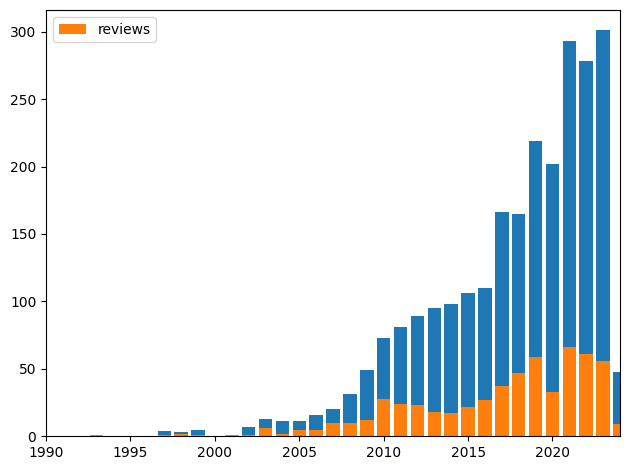

In [51]:
fig, ax = plt.subplots()

base = (hist - hist_rev).fillna(0)
rest = (base - base + hist_rev).fillna(0)

ax.bar(hist.index, base.values[:,0], bottom=rest.values[:,0])
ax.bar(hist.index, rest.values[:,0], label='reviews')

ax.set_xlim(1990, 2024)
ax.legend()
fig.tight_layout()